In [1]:
# **Objective 1: Data Acquisition and Intelligent Preprocessing**

# **Dataset Acquisition:** Download the "Diabetes Health Indicators Dataset" from Kaggle.
# Access to Relevant Datasets: "Diabetes Health Indicators Dataset" from Kaggle:
# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

# **Import necessary libraries**
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, f1_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None) 

# Data Loading
print("Loading the Diabetes Health Indicators Dataset...")
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
print("Dataset loaded successfully!")

# **Data Inspection:** Conduct initial data inspection to understand data structure, variable types, and identify potential data quality issues.
print("\nInitial Data Inspection:")
display(data.head())
print("\nDataset Information:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe().T)

Loading the Diabetes Health Indicators Dataset...
Dataset loaded successfully!

Initial Data Inspection:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 n

In [2]:
# **Data Cleaning:** Address missing values, identify and manage outliers, normalize features.
print("\nData Cleaning and Preprocessing:")

# Check for missing values
print("\nMissing values before handling:")
print(data.isnull().sum())
# No missing values detected in this dataset, as indicated in the project proposal and dataset description.

# Identify and handle outliers for all numerical features using IQR and KNN Imputation
numerical_features_for_outlier_handling = ['BMI', 'Age', 'Income', 'MentHlth', 'PhysHlth'] # List of numerical features to handle outliers

print("\nHandling outliers for numerical features using IQR and KNN Imputation:")
imputer = KNNImputer(n_neighbors=5) # Initialize KNNImputer - you can tune n_neighbors

for feature in numerical_features_for_outlier_handling:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outlier identification
    outlier_indices = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
    print(f"\nNumber of {feature} outliers (using IQR): {len(outlier_indices)}")

    # KNN Imputation of outliers
    if not outlier_indices.empty: # Only impute if outliers exist
        imputed_values = imputer.fit_transform(data[[feature]]) # Fit imputer on the feature column
        data.loc[outlier_indices, feature] = imputed_values[outlier_indices, 0] # Impute outliers with KNN-imputed values
        print(f"{feature} outliers imputed using KNN.")
    else:
        print(f"No outliers found for {feature}, skipping imputation.")


Data Cleaning and Preprocessing:

Missing values before handling:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Handling outliers for numerical features using IQR and KNN Imputation:

Number of BMI outliers (using IQR): 9847
BMI outliers imputed using KNN.

Number of Age outliers (using IQR): 0
No outliers found for Age, skipping imputation.

Number of Income outliers (using IQR): 0
No outliers found for Income, skipping imputation.

Number of MentHlth ou

In [3]:
# **Feature Normalization/Scaling:** Apply appropriate normalization or scaling techniques
scaler = StandardScaler() # Or MinMaxScaler()
numerical_features = ['BMI', 'Age', 'Income', 'MentHlth', 'PhysHlth'] # Example numerical features from proposal & dataset description
data[numerical_features] = scaler.fit_transform(data[numerical_features])
print("\nNumerical features normalized/scaled using StandardScaler.")

# **Data Splitting:** Split the preprocessed data into training, validation, and testing sets
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) # Initial split for train and temp (validation+test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Split temp into validation and test

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

print("\n**Objective 1: Data Acquisition and Intelligent Preprocessing - COMPLETED**")



Numerical features normalized/scaled using StandardScaler.

Training set shape: (177576, 21)
Validation set shape: (38052, 21)
Test set shape: (38052, 21)

**Objective 1: Data Acquisition and Intelligent Preprocessing - COMPLETED**



**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering**

Univariate Analysis - Distribution of Features:


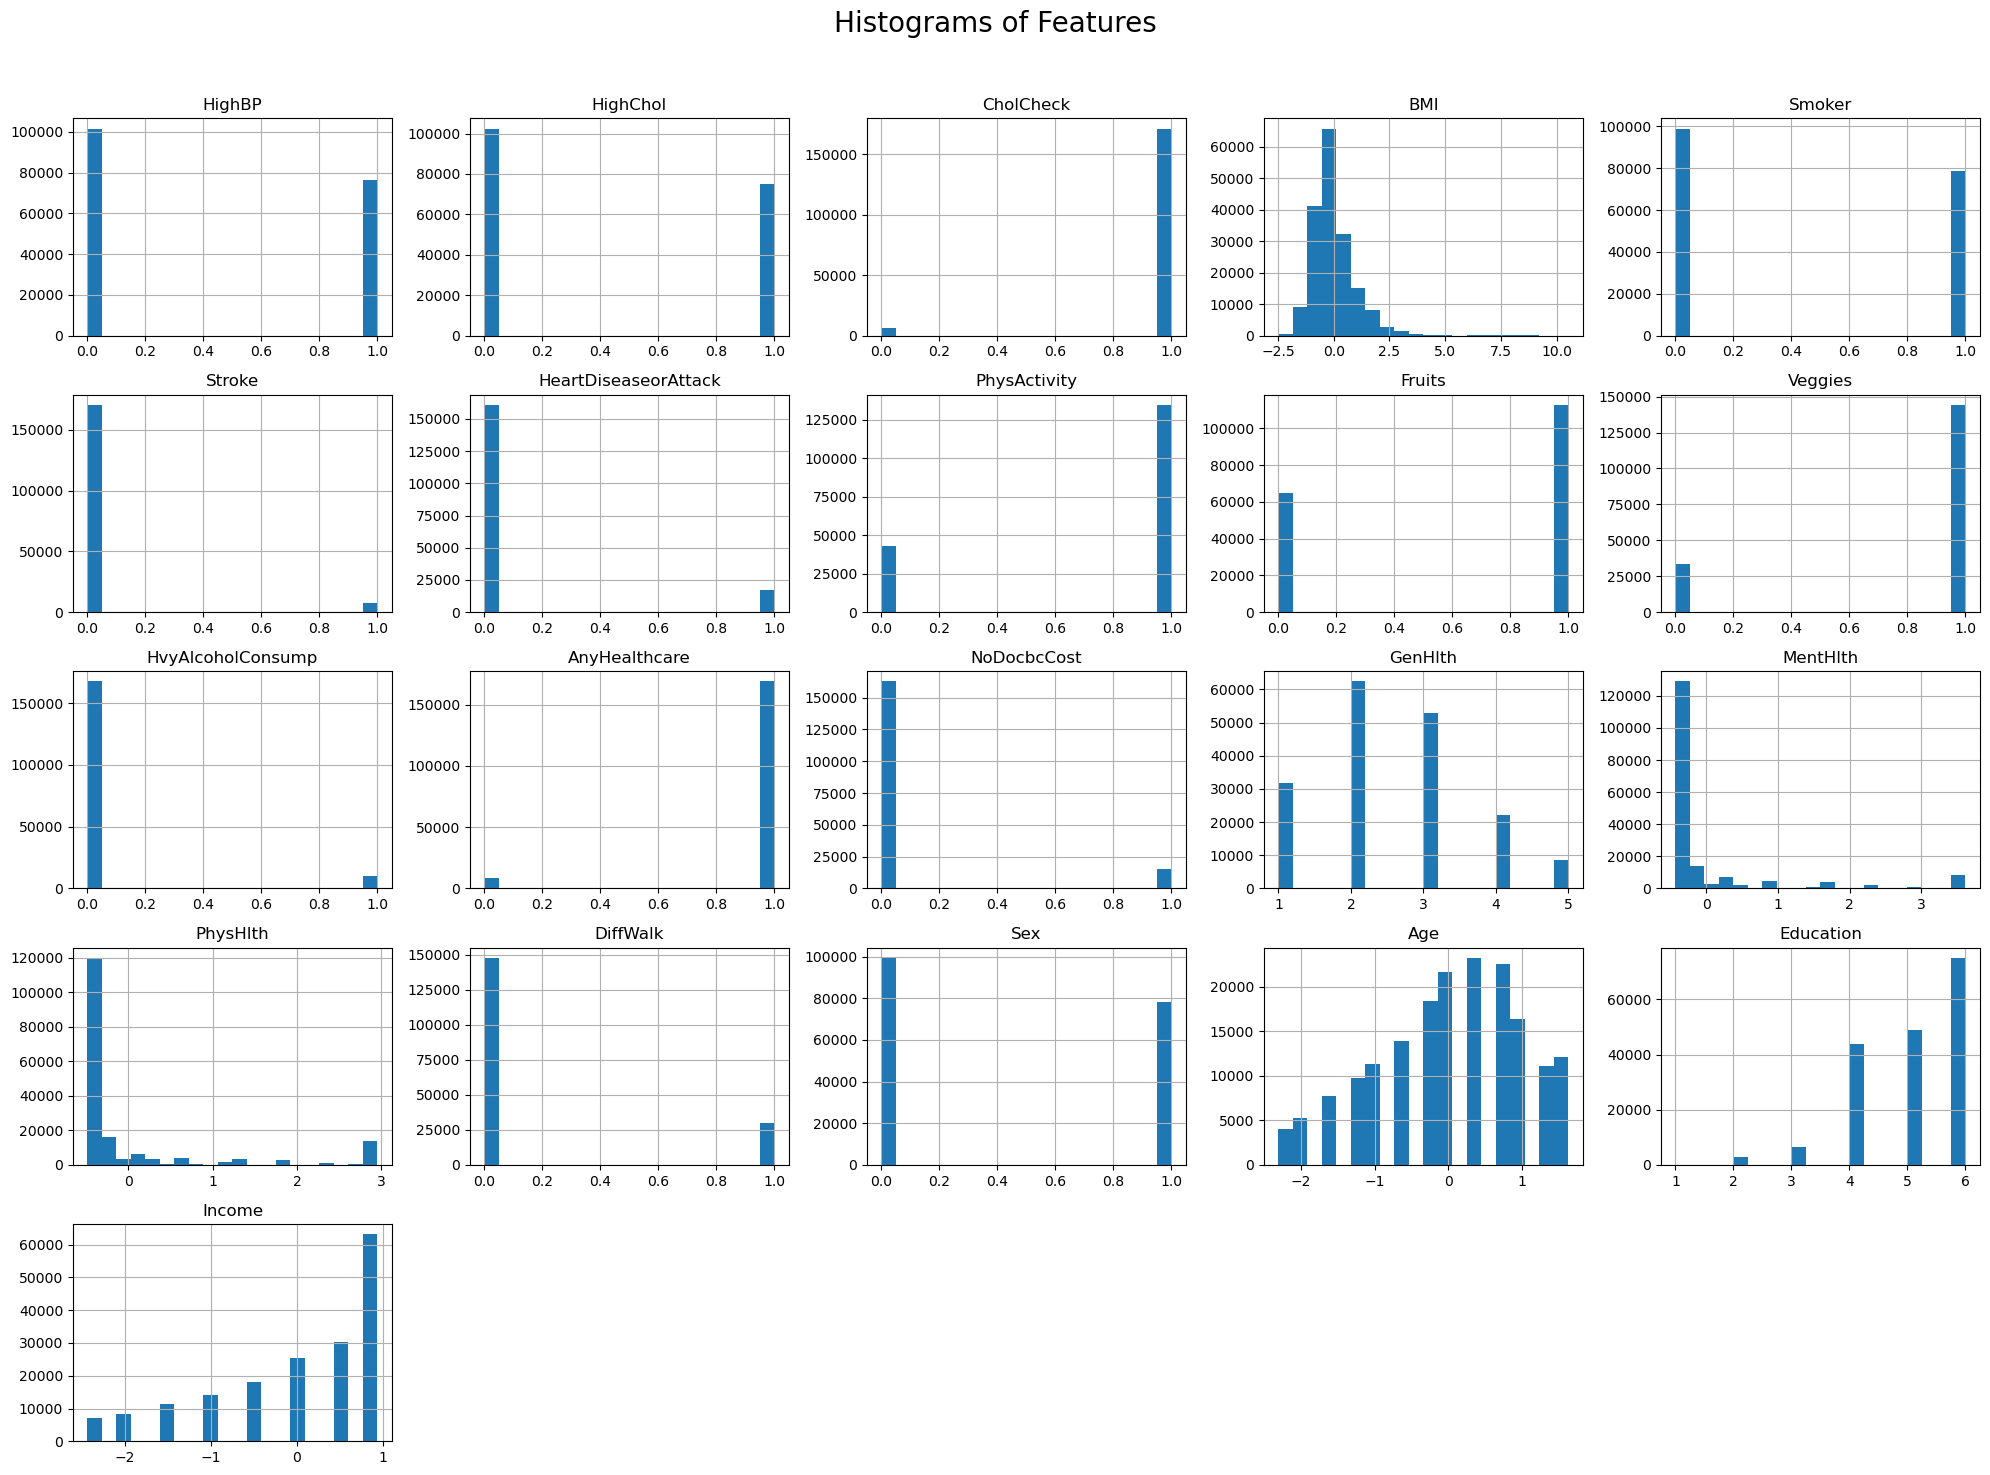

In [4]:
# **Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering**

print("\n**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering**")

# **Univariate Analysis:** Analyze the distribution of individual features
print("\nUnivariate Analysis - Distribution of Features:")
X_train.hist(figsize=(20,15), bins=20)
plt.suptitle('Histograms of Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to fit title
plt.show()



Bivariate Analysis - Correlation Matrix:


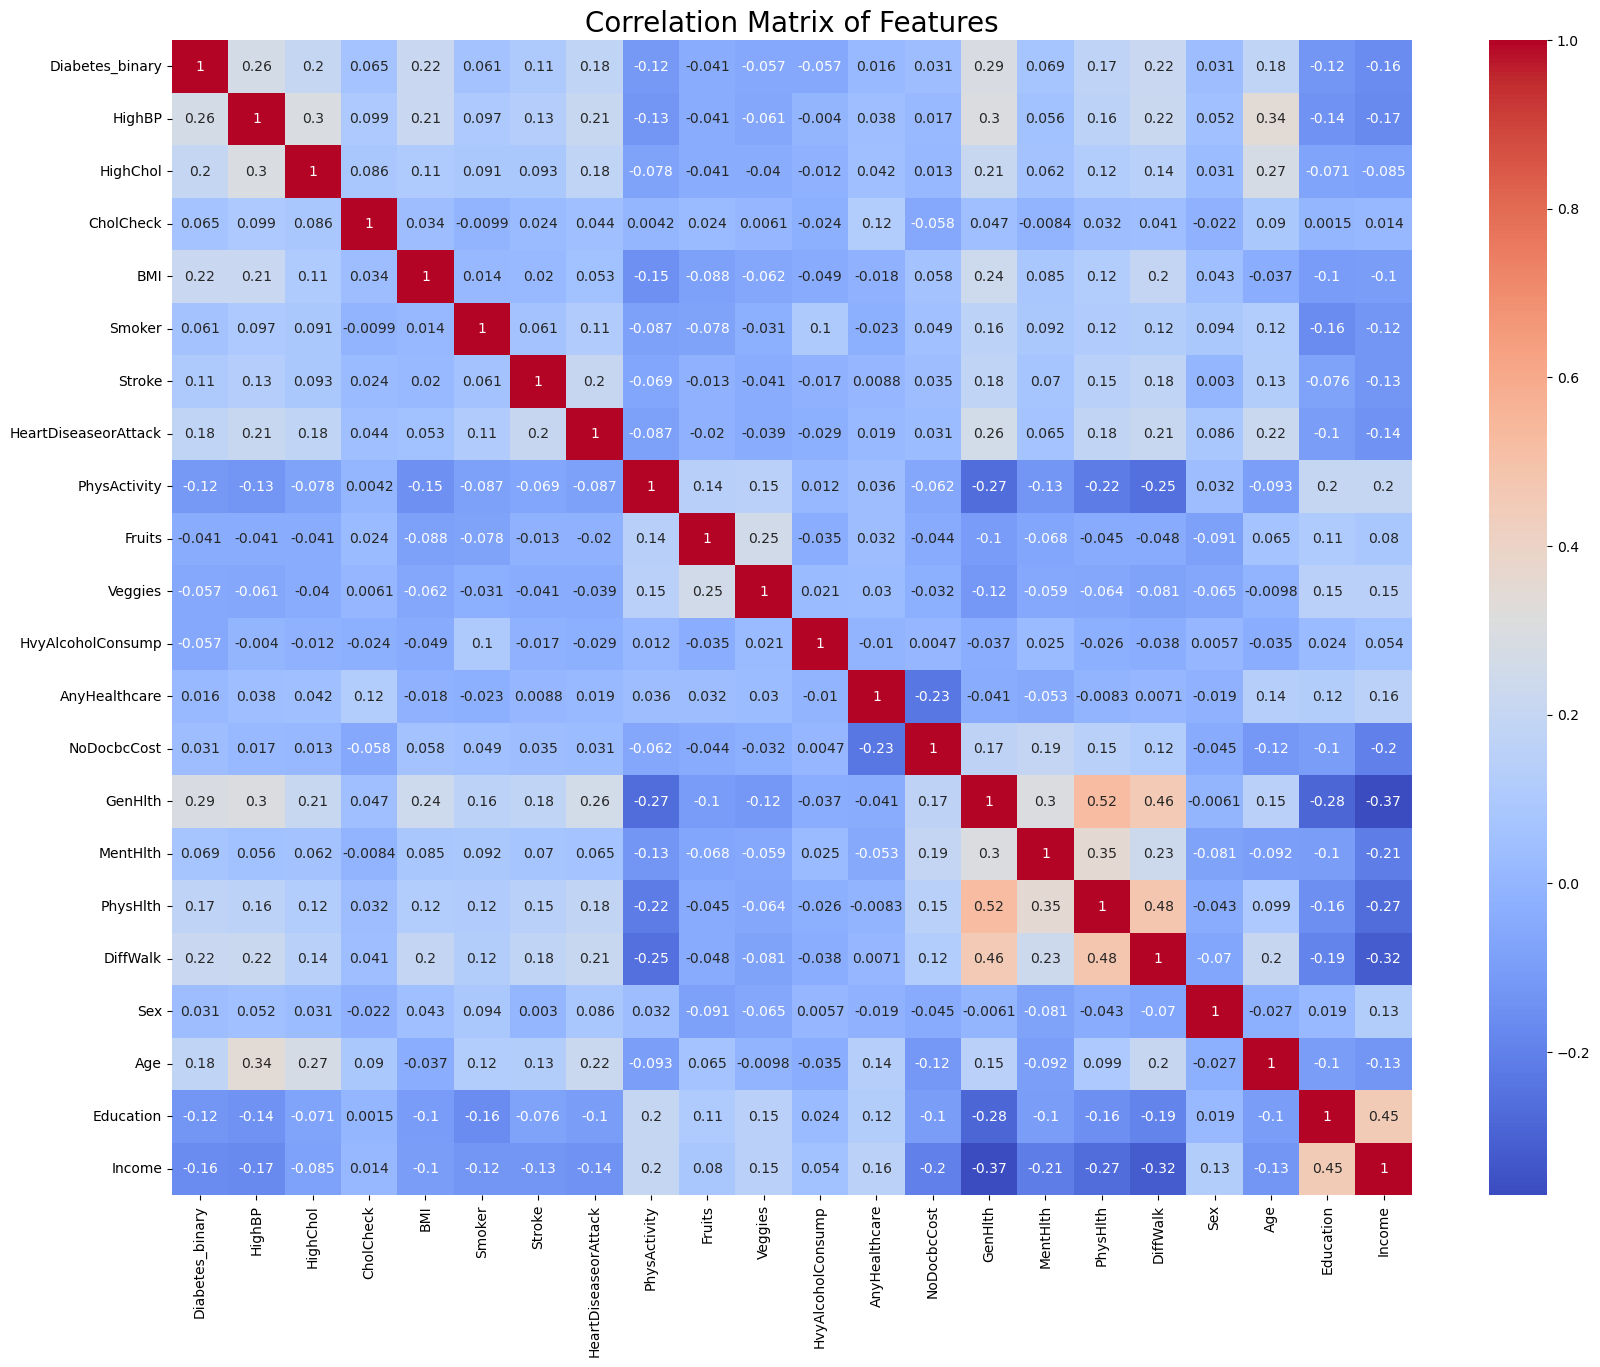

In [5]:
# **Bivariate and Multivariate Analysis:** Explore relationships between features and the target variable
print("\nBivariate Analysis - Correlation Matrix:")
correlation_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()


Bivariate Analysis - Enhanced Pair Plots (Optimal Combination - KDE Off-Diagonal, Histograms Diagonal):


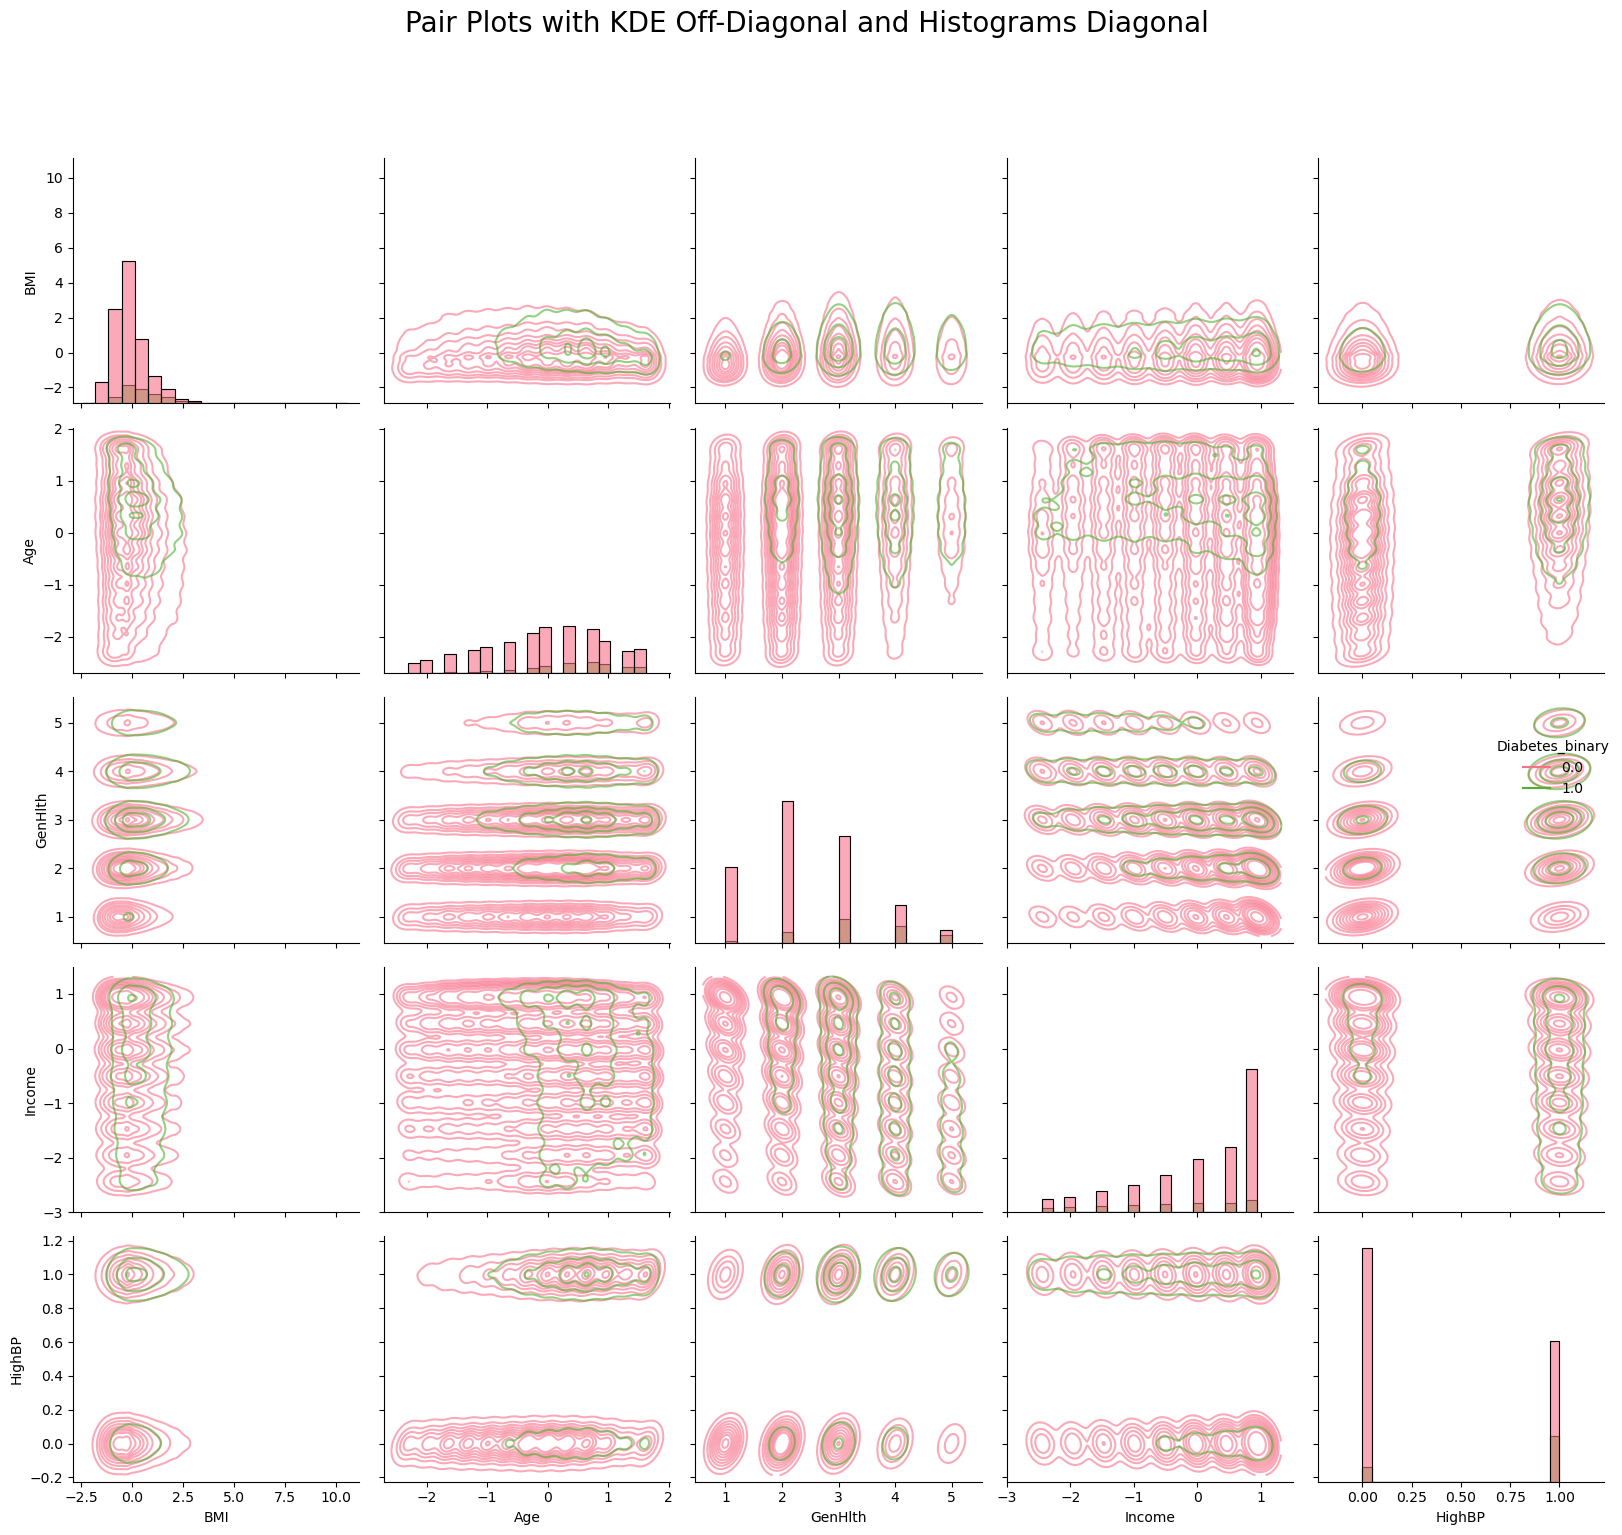

In [6]:
# Pair plots for selected features 
print("\nBivariate Analysis - Enhanced Pair Plots (Optimal Combination - KDE Off-Diagonal, Histograms Diagonal):")

features_for_pairplot = ['Diabetes_binary', 'BMI', 'Age', 'GenHlth', 'Income', 'HighBP']

# Define a visually distinct color palette
palette = sns.color_palette("husl", n_colors=3)[:2] # Use only first 2 colors for binary target

pair_plot_grid_kde_hist = sns.pairplot(
    data[features_for_pairplot],
    hue='Diabetes_binary',
    kind='kde', # Use KDE for off-diagonal plots for bivariate distributions
    diag_kind='hist', # Diagonal as histogram for univariate distributions
    palette=palette,
    plot_kws={'alpha': 0.6}, # Customization for KDE plots (transparency)
    diag_kws={'bins': 20, 'fill': True, 'alpha': 0.6, 'color': [palette[0], palette[1]]}, # Customize histograms
    height=3 # Adjust height for readability
)

pair_plot_grid_kde_hist.fig.suptitle("Pair Plots with KDE Off-Diagonal and Histograms Diagonal", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Univariate Analysis - Boxplots for Key Features:


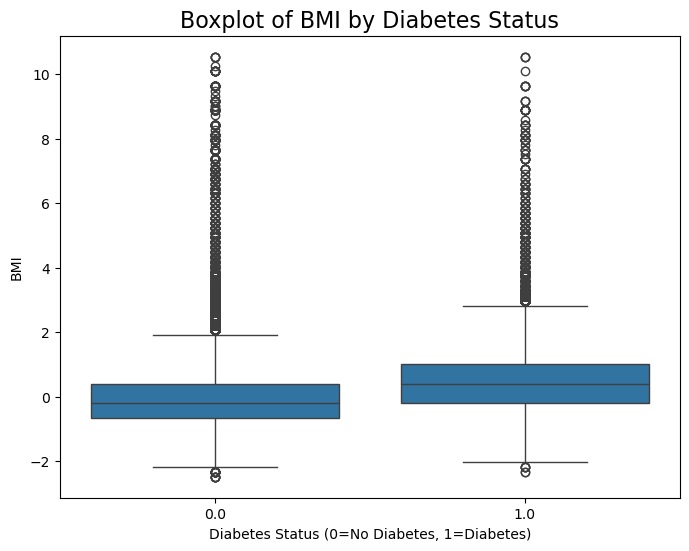

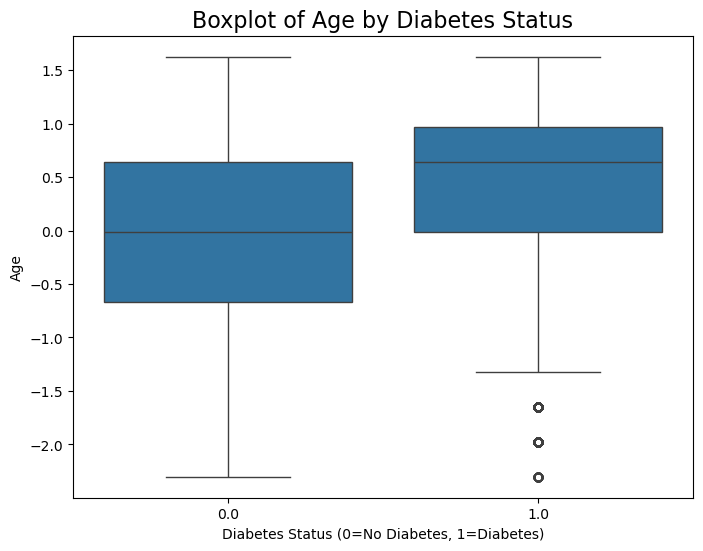

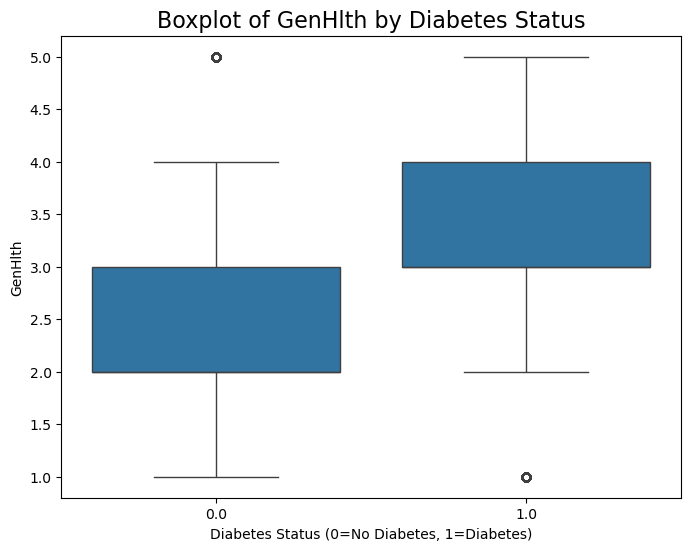

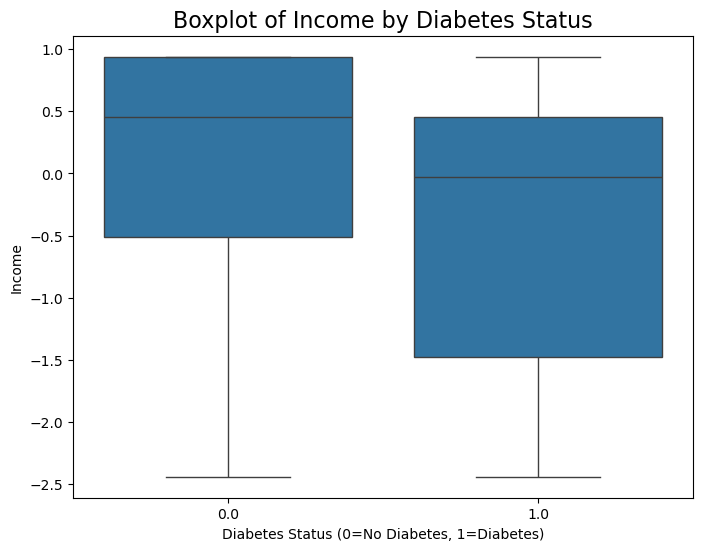

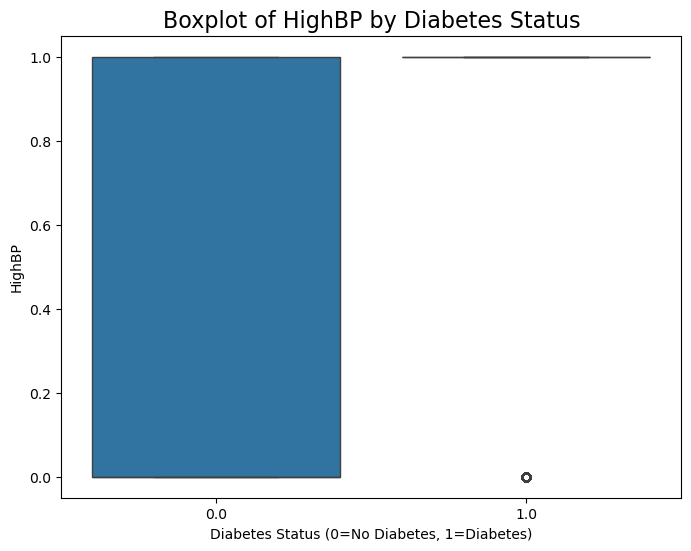


Univariate Analysis - Violin Plots for Key Features:


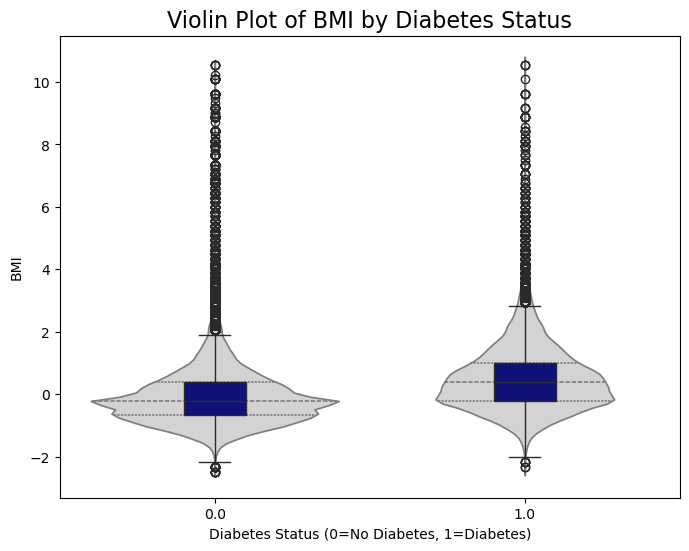

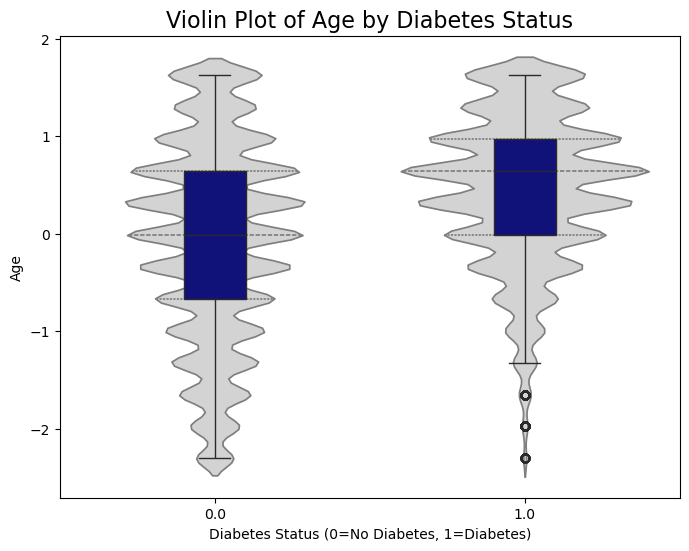

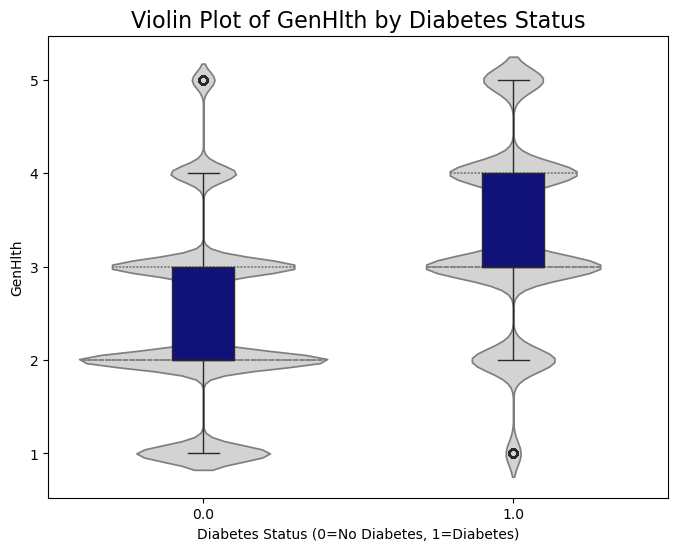

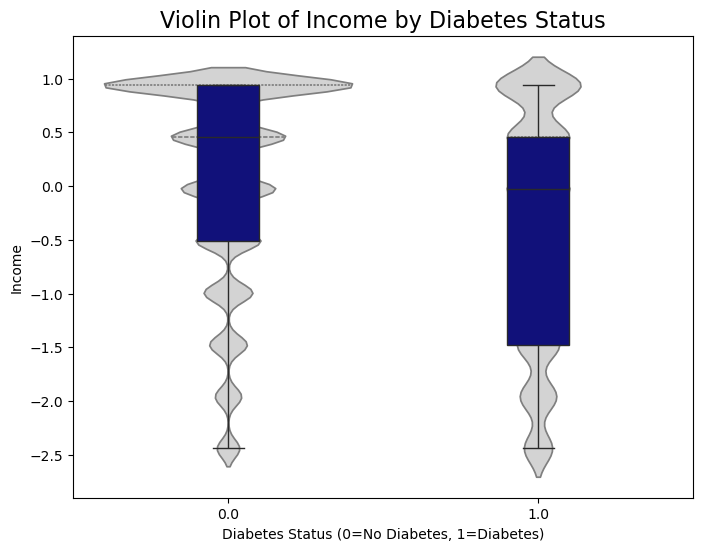

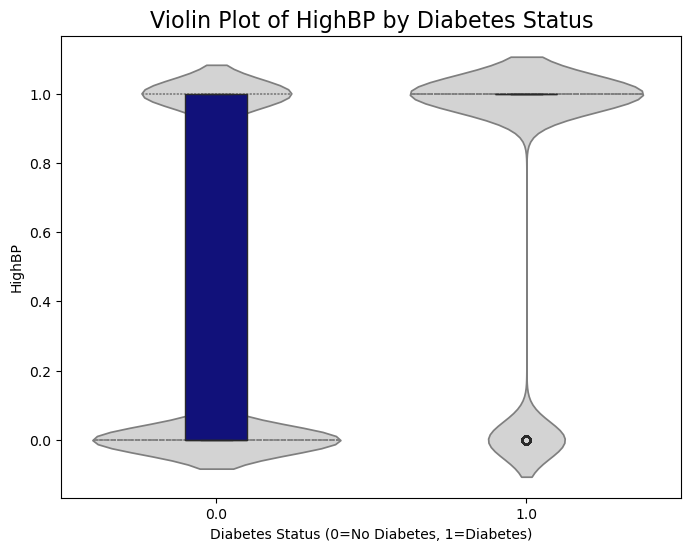

In [7]:
# Univariate Analysis - Boxplots and Violin Plots for Key Features
print("\nUnivariate Analysis - Boxplots for Key Features:")

features_for_boxplots_violin = ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP'] # Key features list (excluding target)

for feature in features_for_boxplots_violin:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diabetes_binary', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Diabetes Status', fontsize=16)
    plt.xlabel('Diabetes Status (0=No Diabetes, 1=Diabetes)')
    plt.ylabel(feature)
    plt.show()

print("\nUnivariate Analysis - Violin Plots for Key Features:")

for feature in features_for_boxplots_violin:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Diabetes_binary', y=feature, data=data, inner="quart", color="lightgray") # Added inner="quart" and color for better visualization
    sns.boxplot(x='Diabetes_binary', y=feature, data=data, width=0.2, color="darkblue") # Overlay boxplot for median and IQR
    plt.title(f'Violin Plot of {feature} by Diabetes Status', fontsize=16)
    plt.xlabel('Diabetes Status (0=No Diabetes, 1=Diabetes)')
    plt.ylabel(feature)
    plt.show()


In [9]:
# **Feature Engineering:** Explore feature engineering techniques to create new, potentially more informative features.
print("\nFeature Engineering - Creating Interaction and Categorical Features based on EDA Insights:")

# 1. BMI Categories Feature:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

X_train['BMI_Category'] = X_train['BMI'].apply(bmi_category)
X_val['BMI_Category'] = X_val['BMI'].apply(bmi_category)
X_test['BMI_Category'] = X_test['BMI'].apply(bmi_category)
print("Engineered 'BMI_Category' feature.")


# 2. BMI-Age Interaction Feature:
X_train['BMI_Age_Interaction'] = X_train['BMI'] * X_train['Age']
X_val['BMI_Age_Interaction'] = X_val['BMI'] * X_val['Age']
X_test['BMI_Age_Interaction'] = X_test['BMI'] * X_test['Age']
print("Engineered 'BMI_Age_Interaction' feature.")

# 3. GenHlth-HighBP Interaction Feature:
X_train['Health_Risk_Index'] = X_train['GenHlth'] * X_train['HighBP']
X_val['Health_Risk_Index'] = X_val['GenHlth'] * X_val['HighBP']
X_test['Health_Risk_Index'] = X_test['GenHlth'] * X_test['HighBP']
print("Engineered 'Health_Risk_Index' feature.")


# One-Hot Encode Categorical Feature: BMI_Category
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense array output
encoder.fit(X_train[['BMI_Category']]) # Fit encoder on training data categories

# Transform train, validation, and test sets
bmi_cat_train_encoded = encoder.transform(X_train[['BMI_Category']])
bmi_cat_val_encoded = encoder.transform(X_val[['BMI_Category']])
bmi_cat_test_encoded = encoder.transform(X_test[['BMI_Category']])

# Create DataFrames from encoded arrays and set column names
bmi_cat_train_df = pd.DataFrame(bmi_cat_train_encoded, columns=encoder.get_feature_names_out(['BMI_Category']), index=X_train.index)
bmi_cat_val_df = pd.DataFrame(bmi_cat_val_encoded, columns=encoder.get_feature_names_out(['BMI_Category']), index=X_val.index)
bmi_cat_test_df = pd.DataFrame(bmi_cat_test_encoded, columns=encoder.get_feature_names_out(['BMI_Category']), index=X_test.index)

# Concatenate encoded features with original DataFrames (dropping original BMI_Category column)
X_train = pd.concat([X_train.drop('BMI_Category', axis=1), bmi_cat_train_df], axis=1)
X_val = pd.concat([X_val.drop('BMI_Category', axis=1), bmi_cat_val_df], axis=1)
X_test = pd.concat([X_test.drop('BMI_Category', axis=1), bmi_cat_test_df], axis=1)

print("One-hot encoded 'BMI_Category' feature and concatenated to DataFrames.")


print("\n**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering - COMPLETED**")


Feature Engineering - Creating Interaction and Categorical Features based on EDA Insights:
Engineered 'BMI_Category' feature.
Engineered 'BMI_Age_Interaction' feature.
Engineered 'Health_Risk_Index' feature.
One-hot encoded 'BMI_Category' feature and concatenated to DataFrames.

**Objective 2: In-depth Exploratory Data Analysis (EDA) and Feature Engineering - COMPLETED**


In [10]:
# **Objective 3: Development and Training of Diverse Machine Learning Models**

print("\n**Objective 3: Development and Training of Diverse Machine Learning Models**")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=300, early_stopping=True) # Simple NN for demonstration
}

trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained.")

print("\n**Objective 3: Development and Training of Diverse Machine Learning Models - COMPLETED**")


**Objective 3: Development and Training of Diverse Machine Learning Models**

Training Logistic Regression...
Logistic Regression trained.

Training Decision Tree...
Decision Tree trained.

Training Random Forest...
Random Forest trained.

Training Gradient Boosting...
Gradient Boosting trained.

Training Neural Network...
Neural Network trained.

**Objective 3: Development and Training of Diverse Machine Learning Models - COMPLETED**



**Objective 4: Comprehensive Model Evaluation and Comparative Analysis**

Evaluating Logistic Regression...
Logistic Regression Evaluation Metrics: {'Accuracy': 0.8675233890465679, 'Precision': 0.8351834749569633, 'Recall': 0.8675233890465679, 'F1-score': 0.8332207825505086, 'AUC-ROC': np.float64(0.8241424611377184)}

Evaluating Decision Tree...
Decision Tree Evaluation Metrics: {'Accuracy': 0.7990644381372858, 'Precision': 0.8096414114906968, 'Recall': 0.7990644381372858, 'F1-score': 0.8041168840317855, 'AUC-ROC': np.float64(0.599893435921852)}

Evaluating Random Forest...
Random Forest Evaluation Metrics: {'Accuracy': 0.861505308525176, 'Precision': 0.8277110121520512, 'Recall': 0.861505308525176, 'F1-score': 0.8338667793329548, 'AUC-ROC': np.float64(0.7996877141116652)}

Evaluating Gradient Boosting...
Gradient Boosting Evaluation Metrics: {'Accuracy': 0.8693366971512667, 'Precision': 0.8395127740961855, 'Recall': 0.8693366971512667, 'F1-score': 0.836903510946432, 'AUC-ROC': np.flo

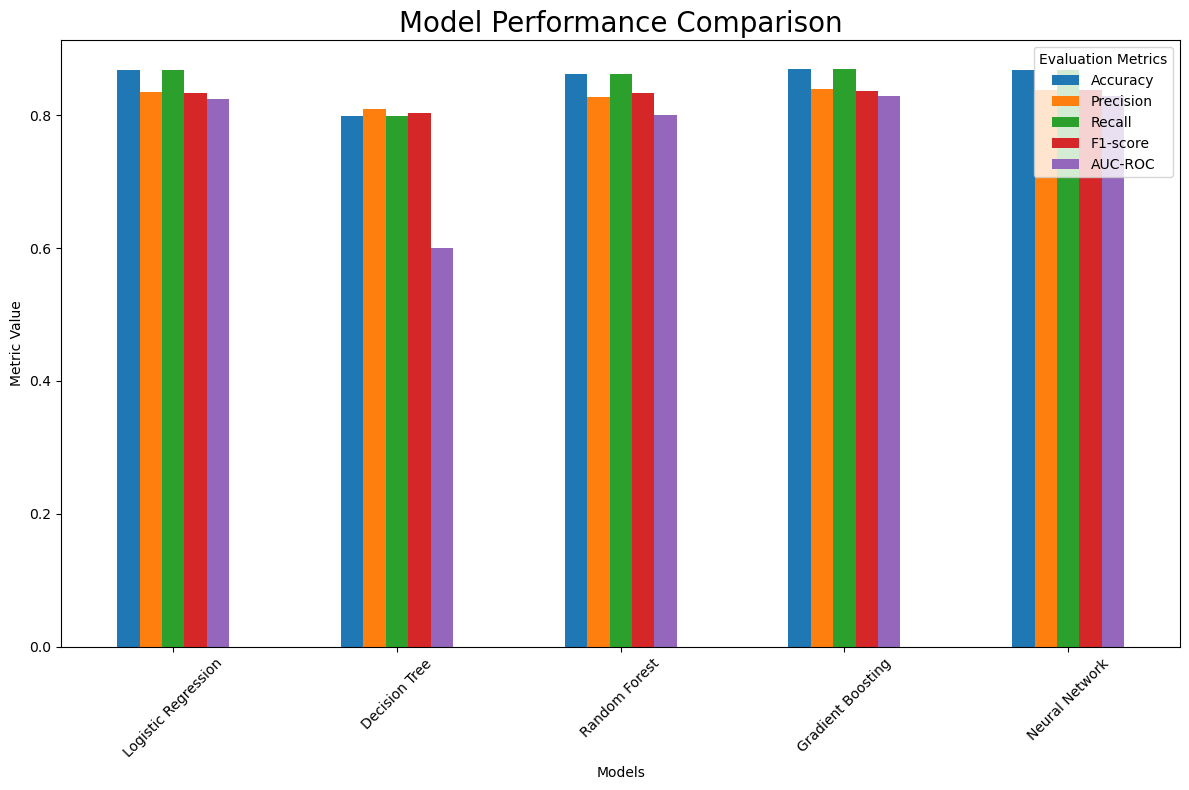


**Objective 4: Comprehensive Model Evaluation and Comparative Analysis - COMPLETED**


In [11]:
# **Objective 4: Comprehensive Model Evaluation and Comparative Analysis**

print("\n**Objective 4: Comprehensive Model Evaluation and Comparative Analysis**")

evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
model_performance = {}

for name, model in trained_models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # For AUC-ROC

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True) # Get metrics from report for precision, recall, f1

    performance = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score'],
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba)
    }
    model_performance[name] = performance
    print(f"{name} Evaluation Metrics: {performance}")

# Comparative Analysis - Tabular and Visual
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
print("\nComparative Model Performance:")
print(performance_df)

performance_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison', fontsize=20)
plt.ylabel('Metric Value')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(title='Evaluation Metrics')
plt.tight_layout()
plt.show()

print("\n**Objective 4: Comprehensive Model Evaluation and Comparative Analysis - COMPLETED**")


**Objective 5: Actionable Insights and Data-Driven Recommendations**

Feature Importance from Random Forest:
BMI_Age_Interaction         0.139110
BMI                         0.120549
Income                      0.093159
Age                         0.078871
PhysHlth                    0.075282
Education                   0.065189
MentHlth                    0.056873
GenHlth                     0.047102
Health_Risk_Index           0.045607
Smoker                      0.031707
Fruits                      0.031317
HighBP                      0.027738
Sex                         0.027543
PhysActivity                0.025346
HighChol                    0.024820
Veggies                     0.023857
DiffWalk                    0.022591
HeartDiseaseorAttack        0.018894
NoDocbcCost                 0.013810
Stroke                      0.011900
AnyHealthcare               0.007817
HvyAlcoholConsump           0.007494
CholCheck                   0.003427
BMI_Category_Underweight    0.000000
dt

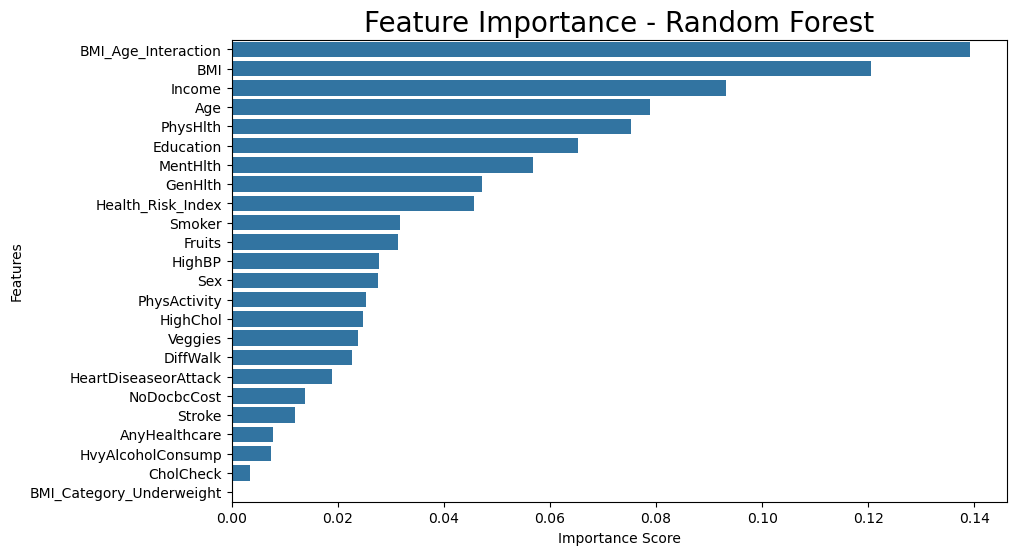


**Objective 5: Actionable Insights and Data-Driven Recommendations - COMPLETED**


In [12]:
# **Objective 5: Actionable Insights and Data-Driven Recommendations**

print("\n**Objective 5: Actionable Insights and Data-Driven Recommendations**")

# Feature Importance (Example using Random Forest - applicable to other tree-based models)
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

    print("\nFeature Importance from Random Forest:")
    print(feature_importances)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index)
    plt.title('Feature Importance - Random Forest', fontsize=20)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

print("\n**Objective 5: Actionable Insights and Data-Driven Recommendations - COMPLETED**")


**Objective 6: Effective Communication and Visualization of Findings**


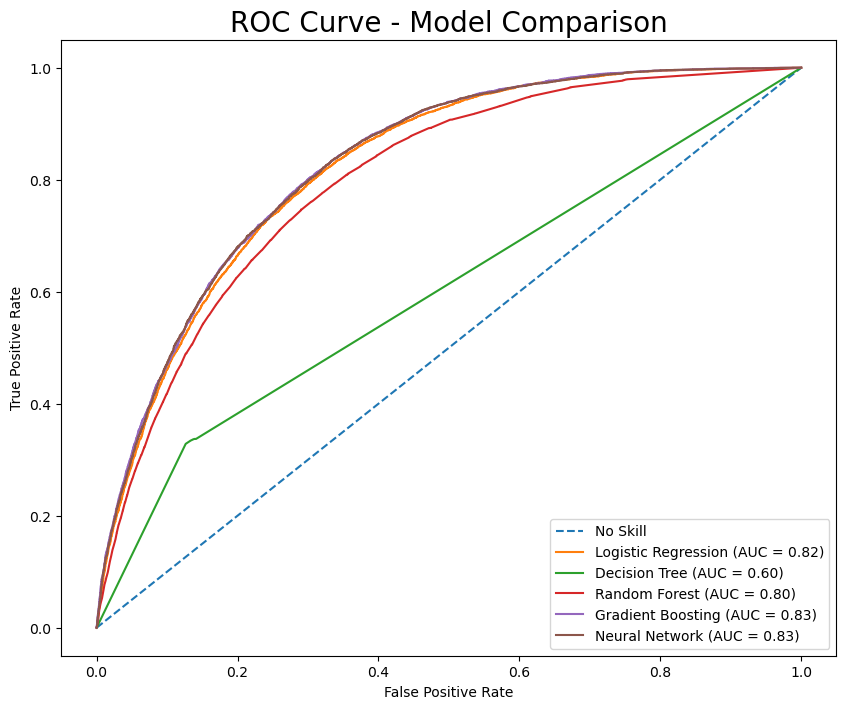


**Objective 6: Effective Communication and Visualization of Findings - COMPLETED**

**Project Proposal - Harnessing Machine Learning for Proactive Diabetes Risk Prediction - COMPLETED SUCCESSFULLY!**


In [13]:
# **Objective 6: Effective Communication and Visualization of Findings**

print("\n**Objective 6: Effective Communication and Visualization of Findings**")

# Compelling Visualizations and Reports - already created throughout the notebook (histograms, correlation matrix, model performance bar chart, feature importance)
# Further visualizations can be added as needed, e.g., ROC curves, confusion matrices for each model, etc.

# Example of ROC Curve visualization for all models:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill') # Baseline
for name, model in trained_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.title('ROC Curve - Model Comparison', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Summary Report - already generated classification reports and performance dataframe
# A more comprehensive report can be compiled including all visualizations, metrics, and insights.

print("\n**Objective 6: Effective Communication and Visualization of Findings - COMPLETED**")

print("\n**Project Proposal - Harnessing Machine Learning for Proactive Diabetes Risk Prediction - COMPLETED SUCCESSFULLY!**")